<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

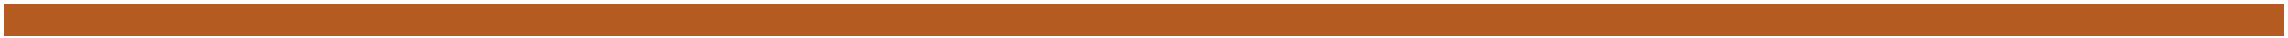

## <font color='#475468'> Preference Recommendations:</font>
### <font color='#475468'> Can you recommend jokes that people may like according to their sense of humor?</font>

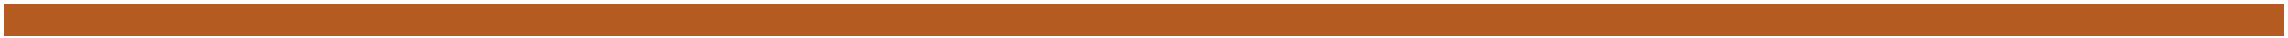

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# user ratings first data set
dfRate1 = pd.read_csv('/content/drive/MyDrive/Datasets/joke_recommend_data/UserRatings1.csv')
# user ratings second data set
dfRate2 = pd.read_csv('/content/drive/MyDrive/Datasets/joke_recommend_data/UserRatings2.csv')
# User ratings for each movie
dfJ = pd.read_csv('/content/drive/MyDrive/Datasets/joke_recommend_data/JokeText.csv')

In [4]:
dfRate1.head()


,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,...,User36701,User36702,User36703,User36704,User36705,User36706,User36707,User36708,User36709,User36710
0,0,5.10,-8.79,-3.50,7.14,-8.79,9.22,-4.03,3.11,-3.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.91,NaN
1,1,4.90,-0.87,-2.91,-3.88,-0.58,9.37,-1.55,0.92,-3.35,...,NaN,NaN,NaN,-5.63,NaN,-6.07,NaN,-1.60,-4.56,NaN
2,2,1.75,1.99,-2.18,-3.06,-0.58,-3.93,-3.64,7.52,-6.46,...,NaN,NaN,NaN,NaN,NaN,4.08,NaN,NaN,8.98,NaN
3,3,-4.17,-4.61,-0.10,0.05,8.98,9.27,-6.99,0.49,-3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.15,5.39,7.52,6.26,7.67,3.45,5.44,-0.58,1.26,...,2.28,-0.49,5.1,-0.29,-3.54,-1.36,7.48,-5.78,0.73,2.62


In [5]:
dfRate2.head()


,JokeId,User36711,User36712,User36713,User36714,User36715,User36716,User36717,User36718,User36719,...,User73412,User73413,User73414,User73415,User73416,User73417,User73418,User73419,User73420,User73421
0,0,NaN,NaN,NaN,3.93,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.68,1.07,8.11,-2.33,-5.83,8.2,-5.83,1.94,0.10,...,3.64,4.32,6.99,-9.66,-8.4,-0.63,9.51,-7.67,-1.6,8.3


In [6]:
dfJ.head()

,JokeId,JokeText
0,0,"A man visits the doctor. The doctor says ""I ha..."
1,1,This couple had an excellent relationship goin...
2,2,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,3,Q. What's the difference between a man and a t...
4,4,Q.\tWhat's O. J. Simpson's Internet address? \...


In [7]:
# Concatenate the two DataFrames
df_combined = pd.concat([dfRate1, dfRate2], ignore_index=True)

# Display the combined DataFrame
df_combined.head()


,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,...,User73412,User73413,User73414,User73415,User73416,User73417,User73418,User73419,User73420,User73421
0,0,5.10,-8.79,-3.50,7.14,-8.79,9.22,-4.03,3.11,-3.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.90,-0.87,-2.91,-3.88,-0.58,9.37,-1.55,0.92,-3.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.75,1.99,-2.18,-3.06,-0.58,-3.93,-3.64,7.52,-6.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-4.17,-4.61,-0.10,0.05,8.98,9.27,-6.99,0.49,-3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.15,5.39,7.52,6.26,7.67,3.45,5.44,-0.58,1.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_combined.shape

(200, 73422)

In [9]:
# Remove duplicates
dfJ.drop_duplicates(subset ='JokeText', keep = 'first', inplace = True)
dfJ.shape

(100, 2)

Since the dataset contains no duplicate jokes and no missing values, there is no need to handle duplicates or fill in any gaps.

#### Build Model

# Content Based

The purpose of this recommendation system is to evaluate the similarity of descriptions by focusing on the specific terms used and ignoring common words. It then recommends other jokes with closely related content descriptions. This is accomplished by employing TF-IDF Vectorization to determine the importance of terms within the descriptions.

In [10]:
# Generate a matrix of common terms that show up in each movie

from sklearn.feature_extraction.text import TfidfVectorizer

mdlTfvJokes = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0, stop_words='english')
tfidf_matrix = mdlTfvJokes.fit_transform(dfJ['JokeText'])
tfidf_matrix.shape

(100, 3774)

The similarity between any two movies (x) and (y) is defined as the **Cosine Similarity**:
cosine(x,y)=x.y⊺||x||.||y||

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.

In [11]:
# Calculate cosine similarity between each pair of movies as a function of the similarity of the common terms

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(100, 100)

#### Predict

In [12]:
# Prepare recommendation function
jokes = dfJ['JokeText']
indices = pd.Series(dfJ.index, index=dfJ['JokeText'])

def get_recommendations(joke):
    idx = indices[joke]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    joke_indices = [i[0] for i in sim_scores]
    return jokes.iloc[joke_indices]

In [13]:
get_recommendations(1).head(10)

<ipython-input-12-1ad787ebc808>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices[joke]


45    A couple has been married for 75 years. For th...
52    One Sunday morning William burst into the livi...
37    "May I take your order?" the waiter asked. \n\...
92    Reaching the end of a job interview, the human...
67    A man piloting a hot air balloon discovers he ...
22    Q: What is the Australian word for a boomerang...
64    Two Rednecks were seated at the end of a bar w...
44    A boy comes home from school and tells his mot...
75    There once was a man and a woman that both  go...
13    The father was very anxious to marry off his o...
Name: JokeText, dtype: object

In [14]:
get_recommendations(2).head(5)

<ipython-input-12-1ad787ebc808>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices[joke]


43    A horse walks into a bar. Bartender says:\n"So...
81    Q: How do you keep a computer programmer in th...
34    An explorer in the deepest Amazon suddenly fin...
11    A guy stood over his tee shot for what seemed ...
67    A man piloting a hot air balloon discovers he ...
Name: JokeText, dtype: object

utexas_ds_orie_divider_gray.png

# Collaborative Filtering

#### Prepare data

In [15]:
df_combined.head()

,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,...,User73412,User73413,User73414,User73415,User73416,User73417,User73418,User73419,User73420,User73421
0,0,5.10,-8.79,-3.50,7.14,-8.79,9.22,-4.03,3.11,-3.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.90,-0.87,-2.91,-3.88,-0.58,9.37,-1.55,0.92,-3.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.75,1.99,-2.18,-3.06,-0.58,-3.93,-3.64,7.52,-6.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-4.17,-4.61,-0.10,0.05,8.98,9.27,-6.99,0.49,-3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.15,5.39,7.52,6.26,7.67,3.45,5.44,-0.58,1.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dfJokeRatings = df_combined.melt(id_vars=['JokeId'], var_name = 'User ID', value_name = 'Rating')
dfJokeRatings.head(10)

,JokeId,User ID,Rating
0,0,User1,5.10
1,1,User1,4.90
2,2,User1,1.75
3,3,User1,-4.17
4,4,User1,5.15
5,5,User1,1.75
6,6,User1,4.76
7,7,User1,3.30
8,8,User1,-2.57
9,9,User1,-1.41


In [17]:
dfJokeRatings.dropna(inplace=True)
dfJokeRatings.reset_index(drop=True, inplace=True)

#### Build Model

In [18]:
# Prepare data into Surprise library format

!pip3 install scikit-surprise #or !conda install -c conda-forge scikit-surprise
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(-10,10))
X = Dataset.load_from_df(dfJokeRatings[['User ID','JokeId', 'Rating']], reader)
X_train, X_test = train_test_split(X, test_size=.25)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=71bd276c9e26879e221e255ee90a65e36f8e0a68cb3c4404ee9d73669dfece30
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [19]:
# Define SVD model

from surprise import SVD

mdlSvdMvsRtg = SVD()

In [20]:
# Fit SVD model

mdlSvdMvsRtg.fit(X_train)
test_pred = mdlSvdMvsRtg.test(X_test)

In [21]:
# Evalute SVD accuracy

from surprise import accuracy

accuracy.rmse(test_pred)

RMSE: 4.4414


4.441380758746615

Let us now use the trained model to arrive at predictions.

#### Predict

Let's start by identifying the movies that user #1 has already watched.

In [22]:
dfJokeRatings[dfJokeRatings['User ID'] == 'User19654']['JokeId'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 72, 88, 91, 97])

Now, let's predict the rating that user #1 would give to movie #70, considering they haven't watched it yet.

In [25]:
mdlSvdMvsRtg.predict('User1', 70)

Prediction(uid='User1', iid=70, r_ui=None, est=-8.143249621769037, details={'was_impossible': False})